In [109]:
from IPython.display import HTML
file_path = 'clusteringPCA.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [110]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Load the dataset in memory and explore its head and shape to understand how the informations are placed inside of it;<br>
Split the dataset into the X matrix of dimension d × N, with d = 784 being the dimension of each datum, N is the number of datapoints, and Y ∈ R N containing the corresponding labels; <br>

In [111]:
# Convert data into a matrix
data = np.array(data)
print(f"Shape of the data: {data.shape}")

# Split data into a matrix X and a vector Y where:
#
# X is dimension (42000, 784)
# Y is dimension (42000, )
# Y is the first column of data, while X is the rest
X = data[:, 1:]
X = X.T
print(f"Shape of X: {X.shape}")
d, N = X.shape

Y = data[:, 0]
print(f"Shape of Y: {Y.shape}")

Shape of the data: (42000, 785)
Shape of X: (784, 42000)
Shape of Y: (42000,)


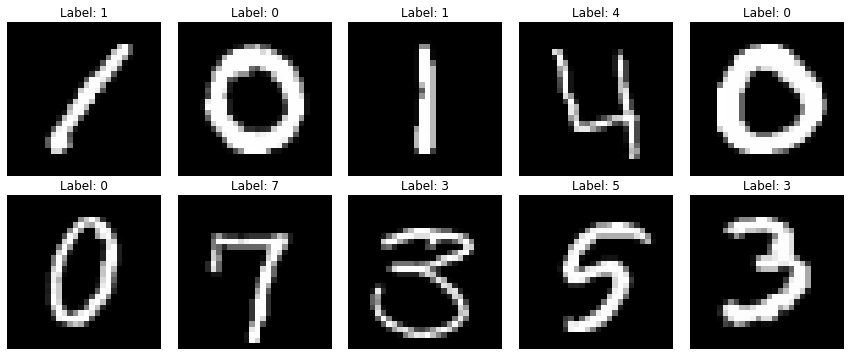

In [112]:
num_images = 10
plt.figure(figsize=(12, 5))

for i in range(num_images):
    image = X[:, i]
    image = np.reshape(image, (28, 28))
    plt.subplot(2, num_images//2, i + 1) 
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {Y[i]}")

plt.tight_layout()
plt.show()

Choose a number of digits (for example, 0, 6 and 9) and extract from X and Y the sub-dataset containing only the considered digits.<br>
 Re-call X and Y those datasets, since the originals are not required anymore;

In [113]:
idx = [0, 6, 9]

# Creating a mask to filter out only the columns of X and Y corresponding to the selected digits
mask = [i for i in range(X.shape[1]) if Y[i] in idx]

# Applying the mask to X and Y to create the new filtered datasets
X = X[:, mask]
Y = Y[mask]

# Printing the shapes of the filtered datasets
print("Shape of filtered X:", X.shape)
print("Shape of filtered Y:", Y.shape)


Shape of filtered X: (784, 12457)
Shape of filtered Y: (12457,)


Set Ntrain < N and randomly sample a training set with Ntrain datapoints from X (and the corresponding Y ). Call them Xtrain and Ytrain. Everything else is the test set. Call it Xtest and
Ytest

In [114]:
def train_test_split(X, Y, N_train):

    idx = np.arange(0, X.shape[1])
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]
    
    X_train = X[:, train_idx]
    Y_train = Y[train_idx]  
    X_test = X[:, test_idx]
    Y_test = Y[test_idx]

    return X_train, Y_train, X_test, Y_test

train_ratio = 0.8
N_train = int(train_ratio * X.shape[1])
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, N_train)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (784, 9965)
Y_train shape: (9965,)
X_test shape: (784, 2492)
Y_test shape: (2492,)


Implement the algorithms computing the PCA of Xtrain with a fixed k. Visualize the results (for k = 2) and the position of the centroid of each cluster;

In [115]:
#np.expand_dims(..., axis=1) reshapes a vector into a column matrix, ensuring the centroid is represented as a matrix with a single column.
def centroid(X):
    return np.expand_dims(np.mean(X,axis=1),axis=1)

Shape of centered data: (784, 9965)
Norm of the centroid of the centered data (should be close to 0): 1.44e-12
Shape of U: (784, 784)
Shape of s: (784,)
Shape of VT: (784, 9965)
Shape of U_k (first 2 columns of U): (784, 2)
Shape of Z_k (projected data in 2 dimensions): (2, 9965)


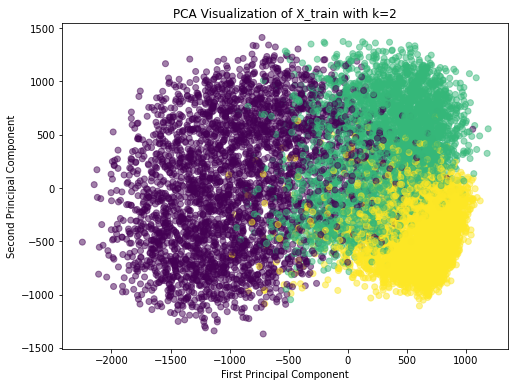

In [116]:
def centroid(X):
    # Calculate the mean of each feature and return it as a column vector
    return np.expand_dims(np.mean(X, axis=1), axis=1)

# Calculate the centroid of the X_train dataset
CX = centroid(X_train)

# Center the data by subtracting the centroid from each data point in X_train
X_train_centered = X_train - CX
print("Shape of centered data:", X_train_centered.shape)

# Verify that the centroid of the centered data is close to zero
centroid_norm = np.linalg.norm(centroid(X_train_centered))
print(f"Norm of the centroid of the centered data (should be close to 0): {centroid_norm:.2e}")

# Perform SVD on the centered data
U, s, VT = np.linalg.svd(X_train_centered, full_matrices=False)
print("Shape of U:", U.shape)
print("Shape of s:", s.shape)
print("Shape of VT:", VT.shape)

# Select the first k left singular vectors (columns of U)
k = 2
U_k = U[:, :k]
print(f"Shape of U_k (first {k} columns of U):", U_k.shape)

# Project the centered data onto the top k principal components
Z_k = U_k.T @ X_train_centered
print(f"Shape of Z_k (projected data in {k} dimensions):", Z_k.shape)

# Visualization of the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(Z_k[0, :], Z_k[1, :], c=Y_train, alpha=0.5, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'PCA Visualization of X_train with k={k}')
plt.show()

• Compute, for each cluster, the average distance from the centroid on the train set. Comment the results;

In [117]:
idx = [0, 6, 9]
distances = []
centroids = []

for i in idx:
    # Extract the data points corresponding to the current label from the training set
    cluster = Z_k[:, Y_train == i]

    # Calculate the centroid of these data points
    cluster_cx = centroid(cluster)
    centroids.append(cluster_cx) 

    # Calculate the Euclidean distance from each data point in the cluster to the centroid
    distance_cx = np.linalg.norm(cluster - cluster_cx, axis=0)
    
    # Append the average distance for the current cluster to the distances list
    distances.append(np.mean(distance_cx))


print("Average distances for training clusters:", distances)

Average distances for training clusters: [738.4934739517306, 537.8551605675603, 365.6178024112473]


(784, 2492)
Centroid of X_test is : 37.709718819286195.
(2, 2492)


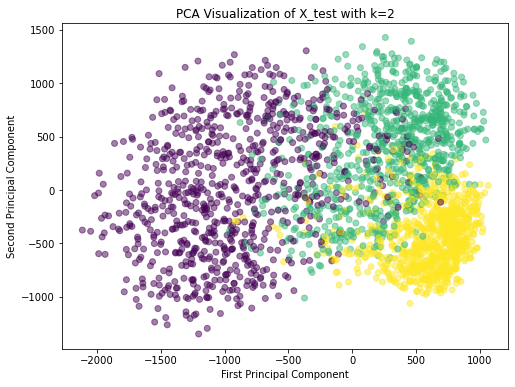

In [118]:
# Using the same centroid already calculated CX=centroid(X_train)
X_test_centered = X_test - CX

print(X_test_centered.shape)
print(f"Centroid of X_test is : {np.linalg.norm(centroid(X_test_centered))}.")

# reuse the same U_k

Z_k_test = U_k.T @ X_test_centered
print(Z_k_test.shape)

# Y_train assigns colors.
plt.figure(figsize=(8, 6))
plt.scatter(Z_k_test[0,:],Z_k_test[1,:], c=Y_test ,alpha=0.5,cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'PCA Visualization of X_test with k={k}')
plt.show()

Compute, for each cluster, the average distance from the centroid on the test set. Comment the results;

In [120]:
idx = [0, 6, 9]
distances = []

label_to_centroid_idx = {0: 0, 6: 1, 9: 2}

for i in idx:

    cluster = Z_k_test[:, Y_test == i]
    centroid_index = label_to_centroid_idx[i]
    cluster_cx = centroids[centroid_index]  
    
    distance_cx = np.linalg.norm(cluster - cluster_cx, axis=0)
    distances.append(np.mean(distance_cx))

print("Average distances for test clusters:", distances)

Average distances for test clusters: [736.480765945645, 559.9044888051794, 368.1653382835122]


In [141]:
def filter_dataset(X, Y, digits):
    indices = [i for i in range(len(Y)) if Y[i] in digits]
    return X[:, indices], Y[indices]

def centroid(X):
        return np.expand_dims(np.mean(X, axis=1), axis=1)

def perfom_pca(X,Y,k):
    CX_train = centroid(X)
    X_centered = X - CX_train
    U,S,VT = np.linalg.svd(X_centered,full_matrices=False)
    U_k = U[:,:k]
    Z_k = U_k.T @ X_centered

    centroids = {}
    for label in range(10):
        cluster = Z_k[:,Y == label]
        cluster_cx = centroid(cluster)
        centroids[label] = (cluster_cx)
    
    return Z_k,U_k,CX_train,centroids


def classify_observation(x,centroids):
    min_dist = np.Inf
    result_label = None

    for label in centroids:
        dist_i = np.linalg.norm(x-centroids[label])
        if dist_i < min_dist:
            min_dist = dist_i
            result_label = label

    return result_label


def calculate_accuracy(predicitions,Y):
    count = 0
    for i in range(len(predicitions)):
        if predicitions[i] == Y[i]:
            count += 1
    accuracy = count/len(predicitions)
    return accuracy

Define a classification algorithm in this way: given a new observation x, compute the distance between
x and each cluster centroid. Assign x to the class corresponding the the closer centroid. Compute the accuracy of this algorithm on the test set and compute its accuracy;

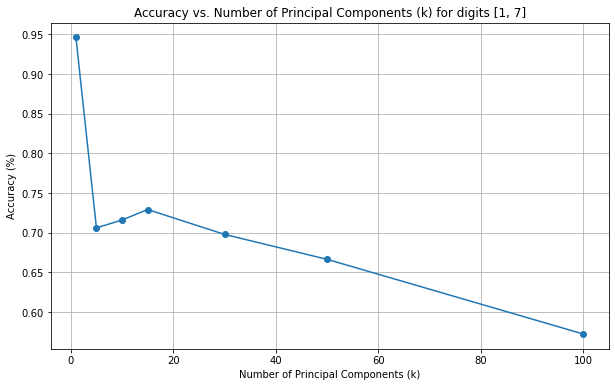

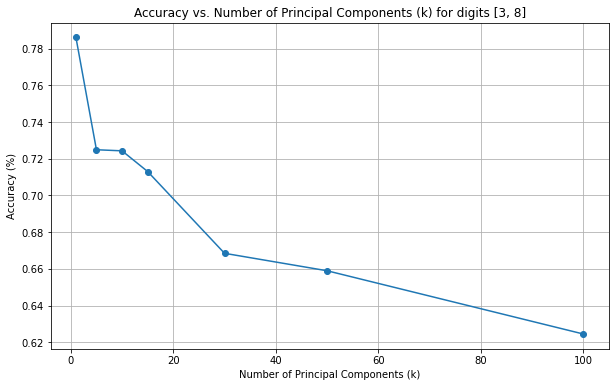

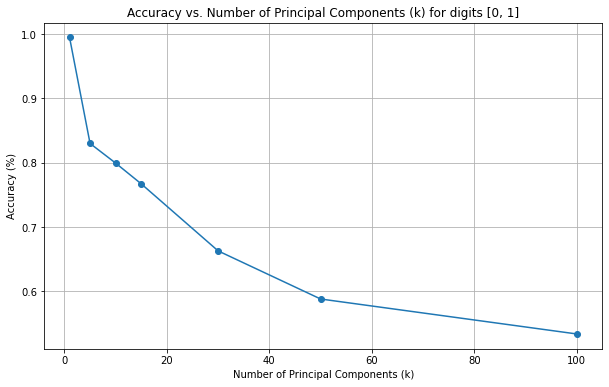

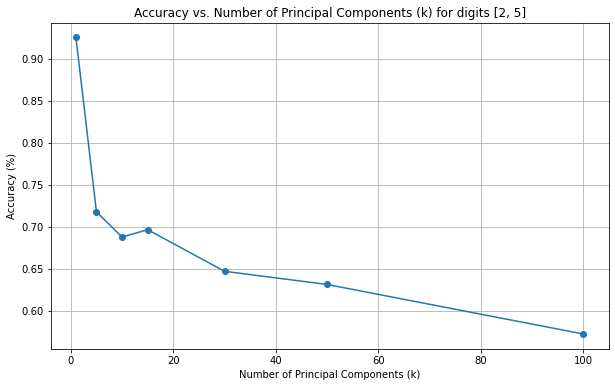

In [154]:
data = pd.read_csv('data.csv')
data = np.array(data)
X = data[:, 1:]
X = X.T
Y = data[:, 0]

k_values = [1,5,10,15,30,50,100]
# (1,7) and (3,8) similar digits; (0,1) and (2,5) different digits 
digits = [[1, 7], [3, 8], [0, 1], [2, 5]]

for i in digits:
    accuracies = []
    X_copy = X.copy()
    Y_copy = Y.copy()
    X_filtered, Y_filtered = filter_dataset(X_copy, Y_copy, i)
    N_train = int(0.8 * X_filtered.shape[1])
    X_train, Y_train, X_test, Y_test = train_test_split(X_filtered, Y_filtered, N_train) 
    for k in k_values:
        Z_train,U_k,CX_train,centroids = perfom_pca(X_train,Y_train,k)
        X_test_centered = X_test - CX_train
        Z_k_test = U_k.T @ X_test_centered
        predictions = []
        for x in Z_k_test.T:
            predictions.append(classify_observation(x,centroids))
        accuracy = calculate_accuracy(predictions,Y_test)
        accuracies.append(accuracy)
        #print(f'Accuracy for k={k}, digits={i}',accuracy)


    plt.figure(figsize=(10,6))
    plt.plot(k_values, accuracies, marker='o')
    plt.title(f'Accuracy vs. Number of Principal Components (k) for digits {i}')
    plt.xlabel('Number of Principal Components (k)')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)
    plt.show()


### Accuracy Variation with Number of Principal Components k

As the number of principal components k used in PCA increases, the accuracy of the associated classifier might initially improve, capturing more relevant information from the data. However, this increase in accuracy is not always indefinite. After reaching a certain number of components, the accuracy might start to decrease or stabilize. This can occur due to several factors:

- **Overfitting**: Including too many components might lead to the model fitting noise in the data rather than the actual underlying patterns, which can degrade its performance on test data.

- **Increased Model Complexity**: More components increase the model's complexity, potentially making it harder to generalize to new, unseen data.

- **Irrelevant Information**: Subsequent principal components may not significantly contribute to class discrimination and might introduce irrelevant or distracting information.

Finding the optimal number of principal components in PCA involves balancing dimensionality reduction and retaining relevant information for accurate classification.
